In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import math
#warnings.filterwarnings("ignore")

In [2]:
def int_to_bin(rgb):
        """Convert an integer tuple to a binary (string) tuple.
        :param rgb: An integer tuple (e.g. (220, 110, 96))
        :return: A string tuple (e.g. ("00101010", "11101011", "00010110"))
        """
        r, g, b = rgb
        return ('{0:08b}'.format(r),
                '{0:08b}'.format(g),
                '{0:08b}'.format(b))
    
def merge_rgb(rgb1, rgb2):
        """Merge two RGB tuples.
        :param rgb1: A string tuple (e.g. ("00101010", "11101011", "00010110"))
        :param rgb2: Another string tuple
        (e.g. ("00101010", "11101011", "00010110"))
        :return: An integer tuple with the two RGB values merged.
        """
        r1, g1, b1 = rgb1
        r2, g2, b2 = rgb2
        rgb = (r1[:4] + r2[:4],
               g1[:4] + g2[:4],
               b1[:4] + b2[:4])
        return rgb
    
def bin_to_int(rgb):
        """Convert a binary (string) tuple to an integer tuple.
        :param rgb: A string tuple (e.g. ("00101010", "11101011", "00010110"))
        :return: Return an int tuple (e.g. (220, 110, 96))
        """
        r, g, b = rgb
        return (int(r, 2),
                int(g, 2),
                int(b, 2))
def merge(img1, img2):
        """Merge two images. The second one will be merged into the first one.
        :param img1: First image
        :param img2: Second image
        :return: A new merged image.
        """

        # Check the images dimensions
        if img2.shape[0] > img1.shape[0] or img2.shape[1] > img1.shape[1]:
            raise ValueError('Image 2 should not be larger than Image 1!')

        # Get the pixel map of the two images
       # pixel_map1 = img1.load()
        #pixel_map2 = img2.load()

        # Create a new image that will be outputted
        #new_image = Image.new(img1.mode, img1.size)
        new_image=np.empty(img1.shape)
        
        #pixels_new = new_image.load()

        for i in range(img1.shape[0]): #sending each pixel to convert it into binary
            for j in range(img1.shape[1]):
                rgb1 = int_to_bin(img1[i, j])

                # Use a black pixel as default
                rgb2 =  int_to_bin((0, 0, 0))

                # Check if the pixel map position is valid for the second image
                if i < img2.shape[0] and j < img2.shape[1]:
                    rgb2 = int_to_bin(img2[i, j])

                # Merge the two pixels and convert it to a integer tuple
                rgb = merge_rgb(rgb1, rgb2)

                new_image[i, j] =bin_to_int(rgb)
       # new_image.astype(int)
       # new_image=np.clip(new_image,a_min=0,a_max=255)
       # new_image = (new_image -new_image.min())/( new_image.max() -  new_image.min())
        return new_image
    
def hide(img1, img2, output): #img1 is cover 
    merged_image = merge(plt.imread(img1), plt.imread(img2))
    merged_image1 = (merged_image -merged_image.min())/( merged_image.max() -  merged_image.min())
    plt.imshow(merged_image1)
    return merged_image
   # print(merged_image)
    
def unmerge(img):
        """Unmerge an image.
        :param img: The input image.
        :return: The unmerged/extracted image.
        """

        # Load the pixel map
        #pixel_map = img.load()

        # Create the new image and load the pixel map
        new_image = np.empty(img.shape)
        #pixels_new = new_image.load()

        # Tuple used to store the image original size
        original_size = (img.shape[0],img.shape[1])

        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                # Get the RGB (as a string tuple) from the current pixel
                r,g,b=int_to_bin((int(img[i, j, 0]),int(img[i, j, 1]),int(img[i, j, 2])))
                
               # r = int_to_bin(int(img[i, j, 0]))
               # g = int_to_bin(int(img[i, j, 1]))
               # b = int_to_bin(int(img[i, j, 2]))
                
                #r, g, b = int_to_bin(img[i, j])

                # Extract the last 4 bits (corresponding to the hidden image)
                # Concatenate 4 zero bits because we are working with 8 bit
                rgb = (r[4:] + '0000',
                       g[4:] + '0000',
                       b[4:] + '0000')

                # Convert it to an integer tuple
                #print(bin_to_int(rgb))
                new_image[i, j] =bin_to_int(rgb)
                

                # If this is a 'valid' position, store it
                # as the last valid position
                #if new_image[i, j] != (0, 0, 0):
                original_size = (i + 1, j + 1)

        # Crop the image based on the 'valid' pixels
        new_image = new_image[0:original_size[0],0:original_size[1]]
        new_image = (new_image -new_image.min())/( new_image.max() -  new_image.min())
        return new_image
    
def unhide(img):
    unmerged_image =unmerge(img)
    plt.imshow(unmerged_image)
    

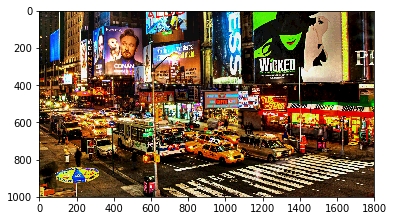

In [3]:
merged_image=hide('../data/img1.jpg','../data/img2.jpg',0)

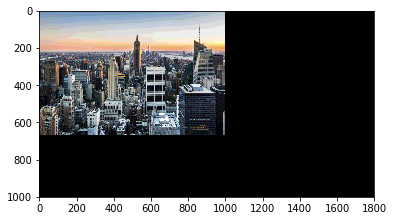

In [4]:
unhide(merged_image)

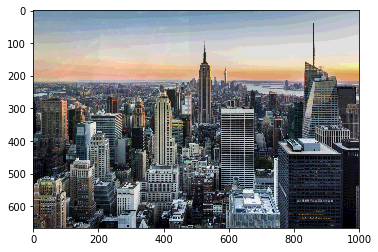

In [5]:
merged_image1 = hide('../data/img2.jpg','../data/Rose.jpg',0)

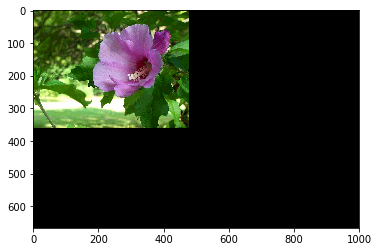

In [6]:
unhide(merged_image1)